<a href="https://colab.research.google.com/github/niranjana2222/Discovering-Potential-Skin-Cancer-Drugs-/blob/main/zinc_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

###Analyze Data####
data = pd.read_csv('/content/zinc2.csv')
print(data.describe())
print(data.head())
print("Size", data.shape)

corr = data.corr().abs()
corr2 = corr.unstack()
print(corr2.sort_values(kind="quicksort", ascending=False))
print("Corr\n", corr2.value_counts())

print((data.max()-data.min()).sort_values(kind="quicksort", ascending=False))
print("Range\n", (data.max()-data.min()).value_counts())

print(data.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Null\n", data.isnull().sum().value_counts().sort_values(kind="quicksort"))


             nAcid        ALogP       ALogp2          AMR         apol  \
count  5328.000000  5328.000000  5328.000000  5328.000000  5328.000000   
mean      0.021021    -0.198765     1.174189    35.330702    42.293825   
std       0.203980     1.065314     1.804372    12.774293     7.413041   
min       0.000000    -5.009100     0.000003     2.898000    17.451172   
25%       0.000000    -0.903675     0.118801    26.053800    37.451067   
50%       0.000000    -0.193050     0.517177    34.525000    42.469895   
75%       0.000000     0.506525     1.474768    43.294300    47.665895   
max       2.000000     3.618000    25.091083    90.128900    62.582134   

        naAromAtom    nAromBond        nAtom   nHeavyAtom           nH  ...  \
count  5328.000000  5328.000000  5328.000000  5328.000000  5328.000000  ...   
mean     10.077515    10.616742    35.515953    19.849662    15.666291  ...   
std       4.130429     4.522754     6.838926     3.345804     4.723571  ...   
min       0.00000

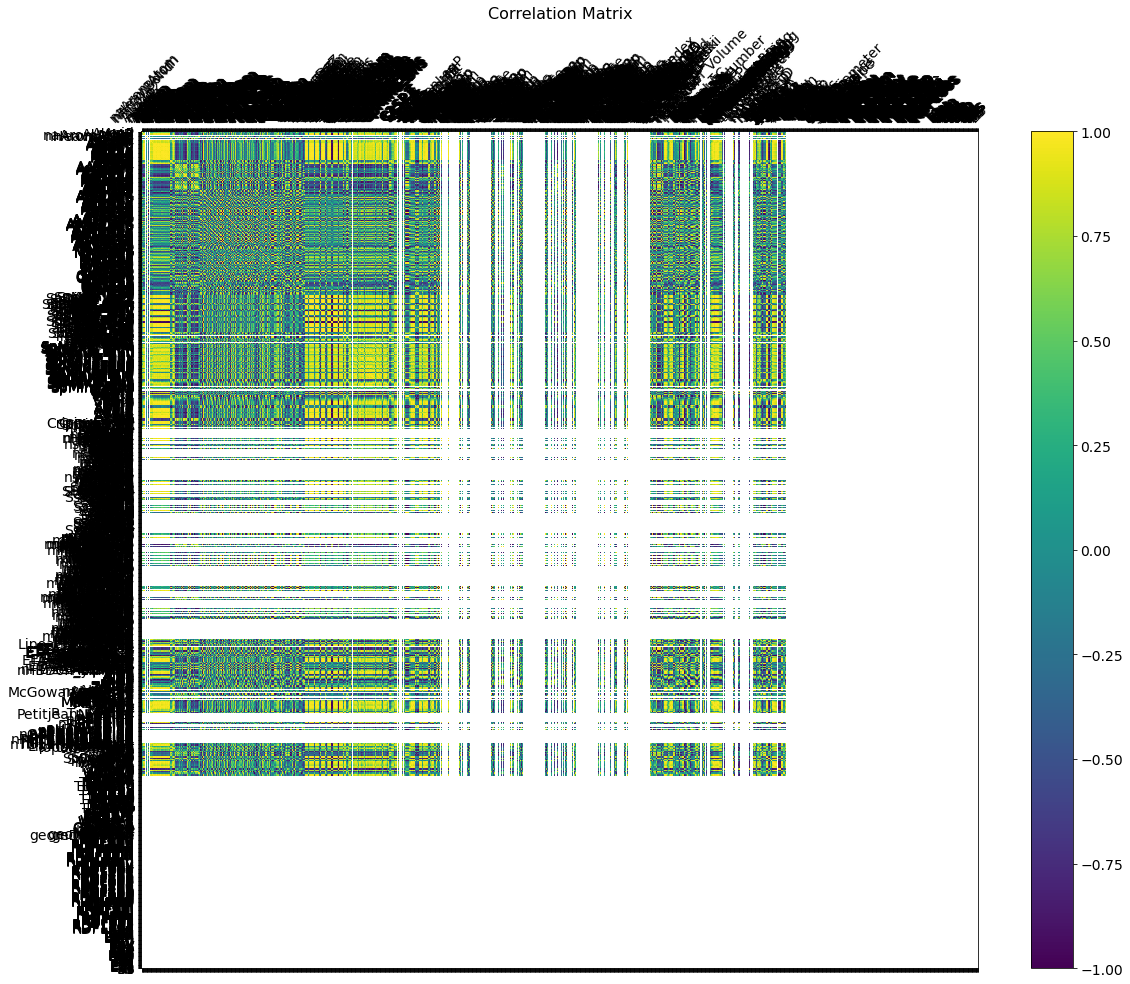

In [3]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[0:5].corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [4]:
#correlation graph 
corr3 = corr2.value_counts().rename_axis('unique_values').to_frame('counts')
print(corr3)


               counts
unique_values        
1.000000         1800
0.002068           32
0.003867           24
0.003268           24
0.004064           24
...               ...
0.020167            2
0.217410            2
0.192976            2
0.080295            2
0.116696            2

[1284530 rows x 1 columns]


<AxesSubplot:ylabel='Number of columns'>

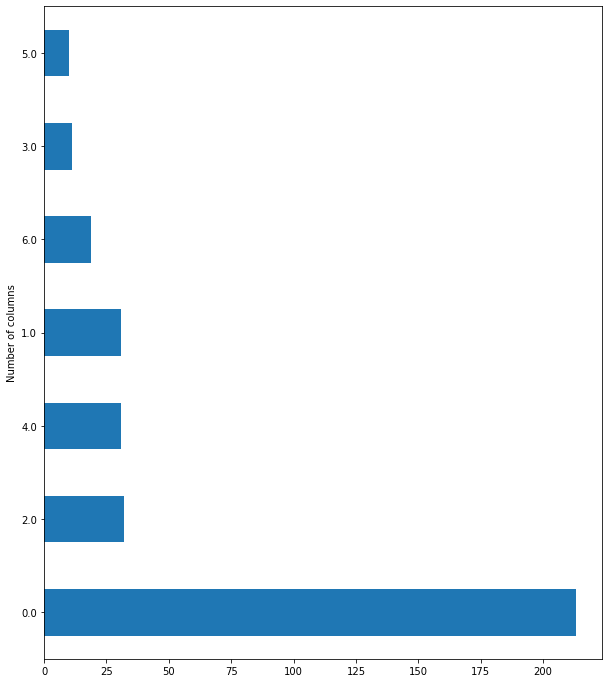

In [5]:
(round(data.max()-data.min(), 2)).value_counts().sort_values(kind="quicksort", ascending=False)[0:5].plot(kind='barh', figsize=(10,12),xlabel="Number of columns", ylabel="Range")


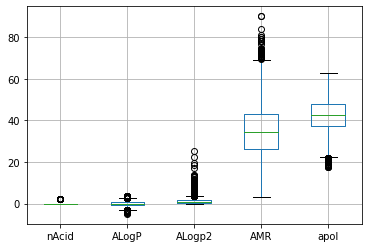

In [6]:
#some descriptor boxplots 
boxplot_nat = data.boxplot(column=['nAcid', 'ALogP', 'ALogp2' , 'AMR' , 'apol'])

In [7]:
#data = data.dropna(axis=1)
print(data.shape[0])
print(data.dropna().shape[0])
print(data[:1289].shape[0])

5328
4738
1289


In [8]:
data = data.dropna()
print(data.shape)
"""
#imputer try
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

for col in data.columns:
    if np.inf in set(data[col]):
        print(col, " ", data[col].value_counts())

data = data.replace([np.inf, -np.inf], np.nan)
print(np.any(np.isnan(data)))
print(np.all(np.isfinite(data)))

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data)
IterativeImputer(random_state=0)
data2 = imp_mean.transform(data)
print(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))
print("Range\n", (data2.max()-data2.min()).value_counts())
"""


(4738, 1875)


'\n#imputer try\nfrom sklearn.experimental import enable_iterative_imputer  # noqa\nfrom sklearn.impute import IterativeImputer\n\nfor col in data.columns:\n    if np.inf in set(data[col]):\n        print(col, " ", data[col].value_counts())\n\ndata = data.replace([np.inf, -np.inf], np.nan)\nprint(np.any(np.isnan(data)))\nprint(np.all(np.isfinite(data)))\n\nimp_mean = IterativeImputer(random_state=0)\nimp_mean.fit(data)\nIterativeImputer(random_state=0)\ndata2 = imp_mean.transform(data)\nprint(data2.isnull().sum().sort_values(kind="quicksort", ascending=False))\nprint("Range\n", (data2.max()-data2.min()).value_counts())\n'